# Population Dynamics II

This is part of **part 2** of Nathaniel Virgo's lectures on population dynamics, as part of the ELSI course.

This lecture roughly follows chapter 3 of Hofbauer and Sigmund's book *Evolutionary Games and Population Dynamics*.

---

You can download this notebook and run it locally if you have Python installed, but you can also access it online at **[insert links]**

If you're viewing this online you can edit the document and run Python code. Your edits will only exist in your browser's cache - other people can't see them.

It's better to use a recent version of Chrome or Firefox when viewing this notebook. If you have problems, try using Chrome.

To run Python code, hold shift and press enter. If you run each cell in sequence, it should re-create all the graphs. If you get an error it probably means you have to run one of the other cells first.

---

If you're using the online version, when you first open this file, select "Run all cells" from the "Run" menu above. This should solve any issues with getting the code to run.

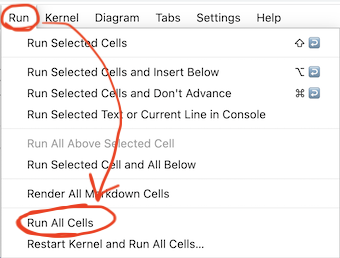

# About the assignment

The assignment for last Tuesday's lecture can be found at **[this link](https://nathanielvirgo.github.io/shared-notebooks/lab?path=Population+dynamics+Assignment.ipynb)**.

**Please use the above link and not the code in the Population Dynamics I notebook, because that code has a bug.**

---

In [1]:
# setup code - run this first.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['figure.figsize'] = [12, 6]

# a convenient function for plotting - put the axes at x=0, y=0.
def center_axes():
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')

Here is the code from last time, which plots the Lotka-Volterra equations. This time we also plot the vector field.

The equations (with intraspecific competition terms) are:

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a-by - ex) \\[1em]
\frac{\mathrm{d}y}{\mathrm{d}t} = y(-c + dx - fy).
$$


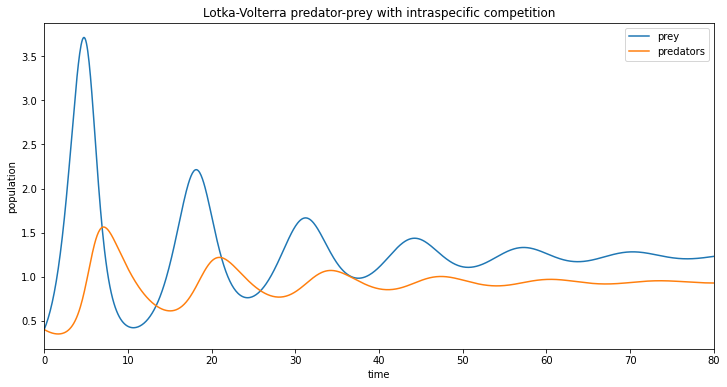

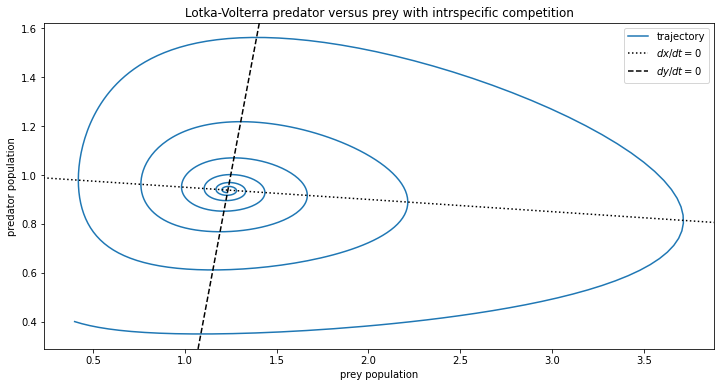

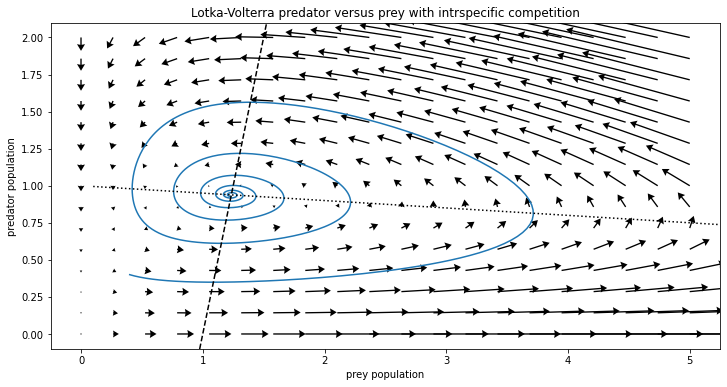

In [52]:
# parameters of the Lotka-Volterra equations (for predator-prey with intraspecific competition)

a = 1               # growth rate of prey
b = 1               # rate at which predators decrease the prey population

c = 0.2             # death rate of predators
d = 0.2             # rate at which prey increase the predator population

e = 0.05            # intraspecific competition for prey
f = 0.05            # intraspecific competition for predators

max_time = 80.0     # simulate until this time

initial_x = 0.4       # initial population of prey
initial_y = 0.4       # initial population of predators



# you don't have to change these - they are just for the arrows in the third plot.

max_x_for_arrows = 5.0
max_y_for_arrows = 2.0
arrow_scale = 30         # a larger number will draw smaller arrows

# you don't need to change anything below this line.
# --------------------------------------------------------------------------------------------------------

def lotka_volterra_2(t, state, a, b, c, d, e, f):
    x, y = state
    dx = x*( a - b*y - e*x)
    dy = y*(-c + d*x - f*y)
    return [dx,dy]


t_span = (0.0,max_time)
t_points = np.linspace(t_span[0], t_span[1], 1000)

initial_state = [initial_x, initial_y]

result_2 = solve_ivp(lotka_volterra_2, t_span, initial_state, t_eval=t_points, args=(a,b,c,d,e,f), method='RK45', rtol=1e-10, atol=1e-10)


# first plot: populations over time

plt.title("Lotka-Volterra predator-prey with intraspecific competition")
plt.ylabel("population")
plt.xlabel("time")

plt.plot(result_2.t, result_2.y[0,:], label="prey")
plt.plot(result_2.t, result_2.y[1,:], label="predators")
plt.xlim(*t_span)
#center_axes()
plt.legend()
plt.show()


# second plot: phase diagram

plt.title("Lotka-Volterra predator versus prey with intrspecific competition")
plt.ylabel("predator population")
plt.xlabel("prey population")

plt.plot(result_2.y[0,:], result_2.y[1,:], label="trajectory")

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# x isocline
x = np.array([0.1,20])
y = (a-e*x)/b 
plt.plot(x,y,'k:',label="$dx/dt=0$",scalex=False, scaley=False)

# y isocline
if f==0:
    x = np.ones_like(x)*c/d
    y = np.array([0.001,20])
else:
    x = np.array([0.001,20])
    y = (-c+d*x)/f 
plt.plot(x,y,'k--',label="$dy/dt=0$",scalex=False, scaley=False)

    
#center_axes()
plt.legend()
plt.show()

# third plot: the vector field


plt.title("Lotka-Volterra predator versus prey with intrspecific competition")
plt.ylabel("predator population")
plt.xlabel("prey population")

plt.plot(result_2.y[0,:], result_2.y[1,:], label="trajectory")

x,y = np.meshgrid(np.linspace(0,max_x_for_arrows,20),np.linspace(0,max_y_for_arrows,15))

xdot = np.zeros_like(x)
ydot = np.zeros_like(x)

# inefficient Python loop
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        xdot[i,j], ydot[i,j] = lotka_volterra_2(0, (x[i,j], y[i,j]), a, b, c, d, e, f)

plt.quiver(x,y,xdot,ydot, scale=30, width=0.002, headwidth=6)
        
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()


# x isocline
x = np.array([0.1,20])
y = (a-e*x)/b 
plt.plot(x,y,'k:',label="$dx/dt=0$",scalex=False, scaley=False)

# y isocline
if f==0:
    x = np.ones_like(x)*c/d
    y = np.array([0.001,20])
else:
    x = np.array([0.001,20])
    y = (-c+d*x)/f 
plt.plot(x,y,'k--',label="$dy/dt=0$",scalex=False, scaley=False)


#plt.legend()
plt.show()


# Lotka-Volterra competition equations

In the predator-prey system we had the following relationships:

 * Prey can reproduce on their own without predators
 * Predators cannot reproduce without prey
 * Prey have a *positive* effect on predators
 * Predators have a *negative* effect on prey
 
Often we want a more symmetric relationship that looks like this:
 
 * Species $X$ can reproduce on their own without species $Y$
 * and also species $Y$ can reproduce on their own without species $X$
 * Species $Y$ has a *negative* effect on species $X$
 * and also species $X$ has a *negative* effect on species $Y$
  
Think of two plants growing in the same place. Both of them can grow by themselves, but they compete for space (and light, water, nutrients etc.)

We can model this with the same equations as above, except that we change the signs of some of the parameters. We keep the intraspecific competition terms, because otherwise our popoulations could grow exponentially forever.

This gives the equations (eq. 3.8 in the book)


$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a - bx - cy) \\[1em]
\frac{\mathrm{d}y}{\mathrm{d}t} = y(d - ex - fy)
$$

where now we interpret the parameters as follows:

 * $a$ - intrinsic growth rate of species $X$
 * $b$ - intraspecific competition term for species $X$
 * $c$ - the negative effect of species $Y$ on species $X$

 * $d$ - intrinsic growth rate of species $Y$
 * $e$ - the negative effect of species $X$ on species $Y$
 * $f$ - intraspecific competition term for species $Y$

The parameters $c$ and $e$ are called **interspecific competition** terms. ("inter" means "between" while "intra" means "within".)

Now the isoclines are given by

$$
a- bx - cy = 0 \qquad\text{or}\qquad y = \frac{a-bx}{c}%x = \frac{cy-a}{b}
$$

and

$$
d - ex - fy \qquad\text{or}\qquad y = \frac{d-ex}{f}%x = \frac{fy-d}{e}
$$

Now let's plot it. The behaviour depends on the parameters - I'll write a function so we can play with the parameters

In [53]:
# helper function
def rand_range(low, hi):
    return np.random.random()*(hi-low) + low

# a version that's biased toward the low end, which makes better plots
def rand_range_biased(low, hi):
    return np.random.random()*(np.random.random()*0.5+0.5)*(hi-low) + low


def plot_competition(a, b, c, d, e, f, x_range, y_range):
    # a, b, c, d, e, f are the parameters
    # x_range and y_range should be of the form [min_x, max_x] and [min_y, max_y].
    
    for i in range(15):
        # solve and plot the equations from a few random starting points
        
        def lotka_volterra_competition(t, state):
            x, y = state
            dx = x*(a - b*x - c*y)
            dy = y*(d - e*x - f*y)
            return [dx,dy]

        t_span = (0.0,80.0)
        t_points = np.linspace(t_span[0], t_span[1], 1000)

        initial_state = [rand_range_biased(*x_range), rand_range_biased(*y_range)]

        result = solve_ivp(lotka_volterra_competition, t_span, initial_state, t_eval=t_points, method='RK45', rtol=1e-10, atol=1e-10)
        
        plt.plot(result.y[0,:], result.y[1,:])
    

    # x isocline
    x = np.array([0.1,20])
    y = (a-b*x)/c 
    plt.plot(x,y,'k:',label="$dx/dt=0$",scalex=False, scaley=False)

    # y isocline
    x = np.array([0.1,20])
    y = (d-e*x)/f
    plt.plot(x,y,'k--',label="$dy/dt=0$",scalex=False, scaley=False)

    plt.xlabel("Species $X$")
    plt.ylabel("Species $Y$")
    
    plt.xlim(x_range)
    plt.ylim(y_range)

    center_axes()
    plt.legend()
    plt.show()

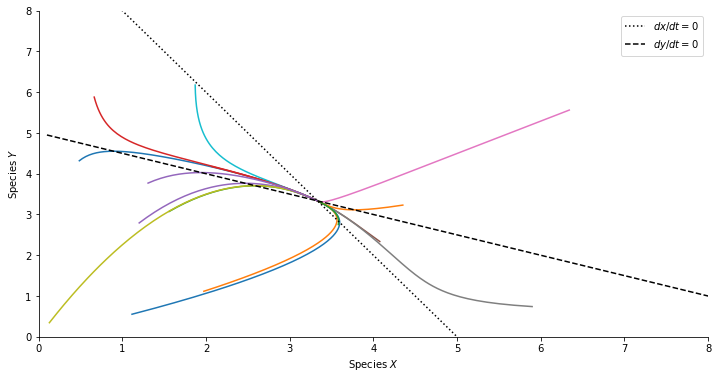

In [58]:
# intrinsic growth rates
a = 1
d = 1 

# intraspecific competition
b = 0.2
f = 0.2

# interspecific competition - try changing these to more or less than 0.2
c = 0.1
e = 0.1

# (what happens if one is higher than 0.2 and one is lower?)
# (what happens if they are both *equal* to 0.2? Why?)


plot_competition(a, b, c, d, e, f, [0,8], [0,8])

# What about cooperation?

We've looked at two different relationship between two species:

 * **predator-prey** had a *postitive* effect of $X$ on $Y$ but a *negative* effect of $Y$ on $X$
 * **competition** had a *negative* effect of $X$ on $Y$ and a *negative* effect of $Y$ on $X$
 
Is there a case where both species have a *positive* effect on each other.

Yes! This relationship is called *mutualism*. It is very important in nature! E.g. think of insects polenating flowers.

Unfortunately though, the Lotka-Volterra equations are not very good for modeling mutualism. If you try to put positive interactions in both directions, the populations can keep growing forever. To model it properly you need different equations with more nonlinear terms, so we skip it.

# More than two species

You might have noticed that when we write the Lotka-Volterra equations, the part inside the brackets is a linear function.

This lets us generalise the Lotka-Volterra equations to more than two species. We can write them as

$$
\frac{\mathrm{d}x_i}{\mathrm{d}t} = x_i g_i,
$$

where 

$$
\mathbf{g} = \mathbf{b} + A\mathbf{x}.
$$

Here I'm using bold for vectors, and $A$ is a matrix. The elements of $\mathbf{b}$ are the intrinsic growth or death rates, depending on whether they're positive or negative. The only restriction on elements of $A$ is that if $A_{ij}>0$ then we should have $A_{ji}\le 0$. (You can't have positive terms in both directions, as mentioned above.)

I won't explain this in detail, but the book has a lot more information if you're interested.

All I want to do here is to demonstrate modeling a **food web**. 

In this case we have a situation where

 * species $X$ can grow by itself (e.g. it's a plant)
 * species $Y$ eats species $X$ (so $X$ and $Y$ are a predator-prey system)
 * species $Z$ eats both species $Y$ and species $X$
 
E.g. species $X$ could be a plant, species $Y$ a herbivore (animal that eats plants) and species $Z$ could be an omnivore (animal that eats both plants and other animals). We call species $X$ a **producer** (because it produces energy) and we call $Y$ and $Z$ **consumers**.

 
We can do that by choosing

$$\mathbf{b} = \begin{pmatrix}+\\-\\-\end{pmatrix},
\qquad
A = \begin{pmatrix}- & - & -\\+ & 0 & -\\+ & + & 0\end{pmatrix},
$$
where "$-$" means any negative number and "$+$" means any positive one. ($a_{22}$ and $a_{33}$ are zero because we don't include intraspecific terms for the consumers.)

The main reason I want to do this is to show something that can't happen with only two species.

In [26]:
# parameters taken from 

# Omnivory Creates Chaos in Simple Food Web Models
# Kumi Tanabe and Toshiyuki Namba
# Ecology Vol. 86, No. 12 (Dec., 2005), pp. 3411-3414 (4 pages)
# https://www.jstor.org/stable/3450749


# growth rate of primary producer
b1 = 5

# death rate of consumers
b2 = -1
b3 = -1.2

# intraspecific competition on producers only
a11 = -0.4

# interactions between species 1 and 2
a12 = -1
a21 = 1

# interactions between species 2 and 3
a13 = -15
a31 = 0.1

# interactions between species 2 and 3
a23 = -1
a32 = 1


def lotka_volterra_three_species(t, state):
    x1, x2, x3 = state

    dx1 = x1*(b1 + a11*x1 + a12*x2 + a13*x3 )
    dx2 = x2*(b2 + a21*x1          + a23*x3 )
    dx3 = x3*(b3 + a31*x1 + a32*x2          )
    
    return [dx1,dx2,dx3]

t_span = (0.0,100)
t_points = np.linspace(t_span[0], t_span[1], 1000)

initial_state = [5,5,5]

result_3 = solve_ivp(lotka_volterra_three_species, t_span, initial_state, t_eval=t_points, method='RK45', rtol=1e-10, atol=1e-10)

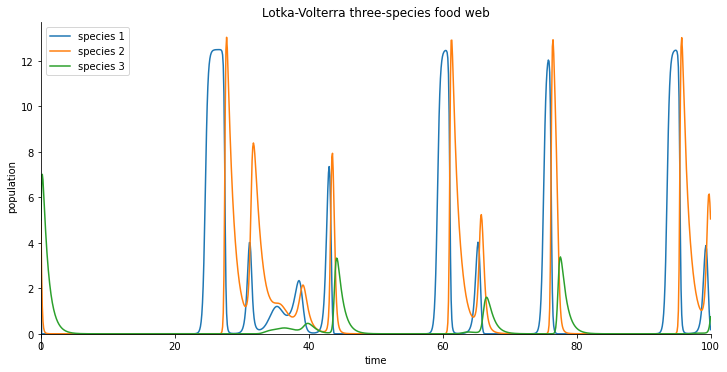

In [27]:
plt.title("Lotka-Volterra three-species food web")
plt.ylabel("population")
plt.xlabel("time")

plt.plot(result_3.t, result_3.y[0,:], label="species 1")
plt.plot(result_3.t, result_3.y[1,:], label="species 2")
plt.plot(result_3.t, result_3.y[2,:], label="species 3")
plt.xlim(*t_span)
center_axes()
plt.legend()
plt.show()


Try increasing the time span from 100 to 500 or so.

This "bursty" pattern continues forever, but it can be proved that it never quite repeats.

This is another example of **chaos**.

In continuous systems, chaos can't happen if you only have species, so this is the simplest kind of chaotic food web model.

Section 5.5 of the book has another interesting example of a 3 species system - it's worth taking a look if you're interested, but we won't cover it.